## Подготовка данных

In [36]:
from data_loading import *
import glob
s = [print(x) for x in sorted(glob.glob("../results/rnn/*/*all_runs*"), key = lambda x : x.split("/")[-1])]

../results/rnn/2019-04-30-01-08/rnn_model_1_all_runs_p1_ecoli_100000_10000_50_00.pyob
../results/rnn/2019-04-30-20-28/rnn_model_2_all_runs_p1_ecoli_100000_10000_50_00.pyob
../results/rnn/2019-05-17-23-31/rnn_model_2_all_runs_p2_ecoli_100000_10000_12_00_cds_False.pyob
../results/rnn/2019-05-02-18-07/rnn_model_3_all_runs_p1_ecoli_100000_10000_50_00.pyob


In [3]:
data_list = generate_data("../results/ecoli_100000_10000", enviroment_size=50, shift = 0)
data = data_list[0]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

# LSTM

In [8]:
from rnn_models import *

In [ ]:
def run_rnn_model_1(data, patience = 1):
    input_size = data.train1.shape[1]
    model = create_rnn_model_1(input_size)
    es = EarlyStopping(monitor='val_loss', verbose=1, patience=patience)
    history = model.fit(data.train1, data.train_ans, epochs=4, callbacks = [es], validation_data=(data.validate1, data.validate_ans))
    return model, history

model, history = run_rnn_model_1(data)

Train on 100000 samples, validate on 10000 samples
Epoch 1/4
 25888/100000 [======>.......................] - ETA: 1:40 - loss: 1.3857 - acc: 0.2625

In [ ]:
model.evaluate(data.test1, data.test_ans)

In [27]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# plot_history(history.history)

In [89]:
model.evaluate(data.test1, data.test_ans)

1000/1000 [==============================] - 1s 641us/step


[1.3603198890686035, 0.316]

In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 10)                600       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 44        
Total params: 644
Trainable params: 644
Non-trainable params: 0
_________________________________________________________________


In [18]:
# with open("../results/rnn/rnn_model_1_all_runs_10_p3.pyob", "rb") as file:
#     (test_accs_1, train_accs_1) = pickle.load(file)  
# print(len(test_accs_1))

Попробуем загрузить модель

In [39]:
a = glob.glob("../results/rnn/*/*all_runs**")
[print(x) for x in a]

../results/rnn/2019-05-17-23-31/rnn_model_2_all_runs_p2_ecoli_100000_10000_12_00_cds_False.pyob
../results/rnn/2019-05-02-18-07/rnn_model_3_all_runs_p1_ecoli_100000_10000_50_00.pyob
../results/rnn/2019-04-30-20-28/rnn_model_2_all_runs_p1_ecoli_100000_10000_50_00.pyob
../results/rnn/2019-04-30-01-08/rnn_model_1_all_runs_p1_ecoli_100000_10000_50_00.pyob


[None, None, None, None]

In [42]:
data_list = generate_data("../results/ecoli_100000_10000", enviroment_size=12, shift = 0, t = 1)
data = data_list[0]

0 

In [43]:
path = "2019-05-17-23-31"
from keras.models import model_from_json
json_file = open('../results/rnn/{}/model.json'.format(path), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
i = 0
loaded_model.load_weights("../results/rnn/{}/{}.weights".format(path, i))
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
data = data_list[i]
# loaded_model.evaluate(data.test1, data.test_ans)

Loaded model from disk


In [44]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 52        
Total params: 868
Trainable params: 868
Non-trainable params: 0
_________________________________________________________________


## Статистика

file ../results/rnn/2019-04-30-01-08/rnn_model_1_all_runs_p1_ecoli_100000_10000_50_00.pyob
file ../results/rnn/2019-04-30-20-28/rnn_model_2_all_runs_p1_ecoli_100000_10000_50_00.pyob
file ../results/rnn/2019-05-17-23-31/rnn_model_2_all_runs_p2_ecoli_100000_10000_12_00_cds_False.pyob
file ../results/rnn/2019-05-02-18-07/rnn_model_3_all_runs_p1_ecoli_100000_10000_50_00.pyob
8 9 30 30 

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


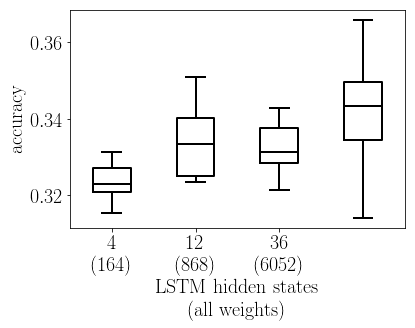

In [38]:
# a = glob.glob("../results/rnn/*/*all_runs_p1**")
# [print(x) for x in a]

# for path in a:
#     train, val, test = plot_hist(path, funcs = [])
    
    
    
from data_loading import *
import matplotlib.pyplot as plt
%matplotlib inline

test_list = [test_accs(x) for x in sorted(glob.glob("../results/rnn/*/*all_runs*100000**"), key = lambda x : x.split("/")[-1])]

[print(len(x), end = " ") for x in test_list]

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'weight' : 200, 'size'   : 20})
# rc('font',**{'family':'serif','serif':['Times'], 'weight' : 700, 'size'   : 26})
rc('text', usetex=True)

# plt.hlines(0.25, 0, 4, color = 'red', linewidth = 2)
# plt.ylim(0.29, 0.35)
plt.boxplot(test_list,
            medianprops=dict(color="black", linewidth = 2),
            boxprops=dict(linewidth = 2),
            capprops=dict(linewidth = 2),
            whiskerprops=dict(linewidth = 2),)

plt.xticks(range(1,4), ("4 \n (164)", "12 \n (868)", "36 \n (6052)") )
plt.ylabel("accuracy")
plt.xlabel("LSTM hidden states \n (all weights) ")
# plt.title("RNN model 1 (kernel = 6)")
plt.savefig("../results/pics/rnn_models_all_runs_p1_ecoli_100000_10000_50_0.png", dpi=300, bbox_inches='tight')
plt.show()

In [30]:
# a, b, c = plot_hist("../results/rnn/2019-04-30-01-08/rnn_model_1_all_runs_p1_ecoli_100000_10000_50_00.pyob")

# Модели, возвращающие последовательность

In [4]:
from keras.layers import Input, RNN, Flatten, Dense, Embedding, LSTM
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [23]:
inp = Input(shape = (50, 4))
x = LSTM(12, recurrent_dropout=0, dropout=0, return_sequences = True)(inp)
print(x.shape)
x = Dense(4,activation='softmax')(x)
print(x.shape)
model = Model(inp, x)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()

(?, ?, 12)
(?, 50, 4)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 50, 4)             0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 50, 12)            816       
_________________________________________________________________
dense_14 (Dense)             (None, 50, 4)             52        
Total params: 868
Trainable params: 868
Non-trainable params: 0
_________________________________________________________________


# Attention

In [2]:
from data_loading import *
data_list = generate_data("../results/ecoli_100000_10000", enviroment_size=50, shift = 0)
data = data_list[0]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Input, RNN, Flatten, Dense, Embedding, LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras_self_attention import SeqSelfAttention

In [19]:
model = Sequential()
model.add(LSTM(12, recurrent_dropout=0, dropout=0, return_sequences=True ))
model.add(SeqSelfAttention(attention_activation='sigmoid', attention_width=4))
model.add(LSTM(12, recurrent_dropout=0, dropout=0, return_sequences=False))
model.add(Dense(4,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])


In [ ]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=1)
checkpointer = ModelCheckpoint(filepath = '../results/attention/model-1-{epoch:02d}.hdf5', verbose=1)
history = model.fit(data.train1, data.train_ans, epochs=100, callbacks = [es], validation_data=(data.validate1, data.validate_ans))

Train on 100000 samples, validate on 10000 samples
Epoch 1/100
  8192/100000 [=>............................] - ETA: 16:41 - loss: 1.3857 - acc: 0.2644

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            11000     
_________________________________________________________________
seq_self_attention_2 (SeqSel (None, 50, 50)            3265      
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dense_2 (Dense)              (None, 50, 4)             204       
Total params: 34,669
Trainable params: 34,669
Non-trainable params: 0
_________________________________________________________________
